# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

#### Biblioteca de importação

In [51]:
import pandas as pd

import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score 

import numpy as np

import statsmodels.formula.api as smf
%matplotlib inline

#### Carregando base de dados

In [52]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

#### Visualização do modelo sem a transformação da variavél x 

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        19:34:09   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

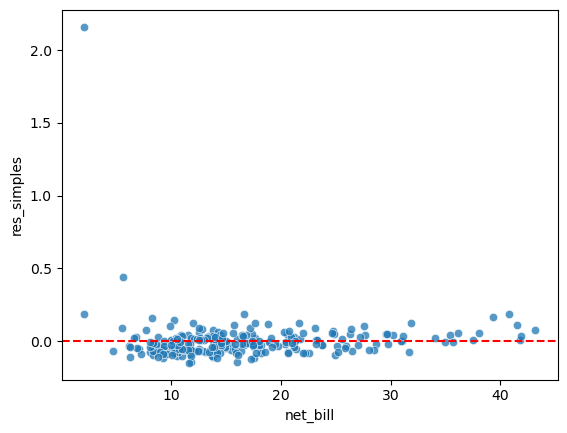

In [53]:
reg_simples = smf.ols('tip_pct ~ net_bill', data = tips).fit()
print(reg_simples.summary())
tips['res_simples'] = reg_simples.resid

sns.scatterplot(x = 'net_bill', y = tips['res_simples'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

#### Ajuste do modelo em função do logaritmo

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           1.62e-13
Time:                        19:34:09   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054  

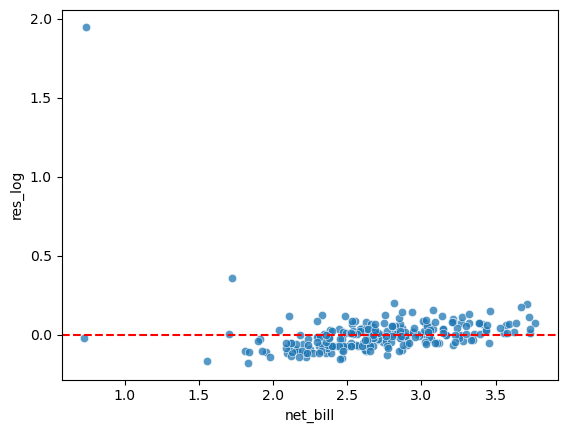

In [54]:
reg_log = smf.ols('tip_pct ~ np.log(net_bill)', data = tips).fit()
print(reg_log.summary())
tips['res_log'] = reg_log.resid

sns.scatterplot(x = np.log(tips['net_bill']), y = tips['res_log'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

#### Ajuste do modelo em função do polinômio

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     13.48
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           0.000297
Time:                        19:34:10   Log-Likelihood:                 102.94
No. Observations:                 244   AIC:                            -201.9
Df Residuals:                     242   BIC:                            -194.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.23

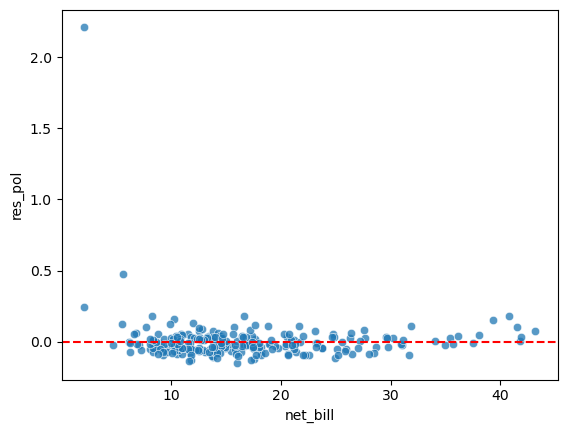

In [55]:
reg_pol = smf.ols('tip_pct ~ np.power(net_bill,2) ', data = tips).fit()
print(reg_pol.summary())
tips['res_pol'] = reg_pol.resid

sns.scatterplot(x = 'net_bill', y = tips['res_pol'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           8.27e-16
Time:                        19:34:10   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

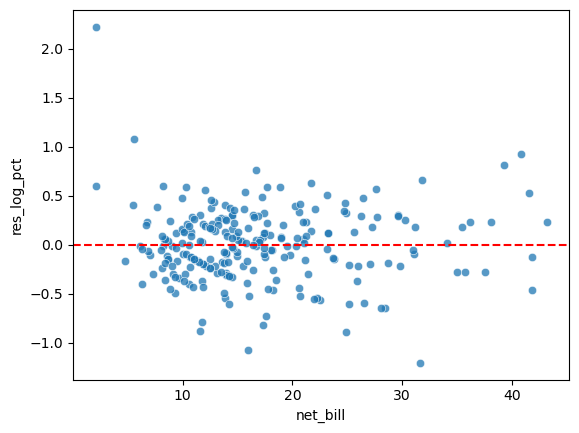

In [56]:
reg_log_pct = smf.ols(' np.log(tip_pct) ~ net_bill', data = tips).fit()
print(reg_log_pct.summary())
tips['res_log_pct'] = reg_log_pct.resid

sns.scatterplot(x = 'net_bill', y = tips['res_log_pct'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [57]:
# obtendo o R² do modelo ajustado
r2_log_pct = reg_log_pct.rsquared
print(r2_log_pct)

0.23534487140864313


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           5.20e-20
Time:                        19:36:09   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

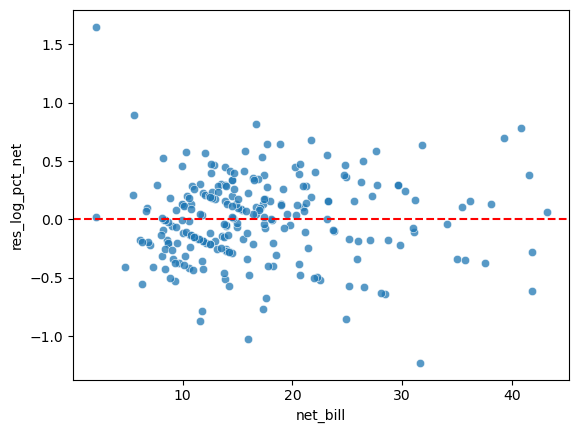

In [60]:
reg_log_pct_net = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data = tips).fit()
print(reg_log_pct_net.summary())
tips['res_log_pct_net'] = reg_log_pct_net.resid

sns.scatterplot(x = 'net_bill', y = tips['res_log_pct_net'], data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

In [61]:
# obtendo o R² do modelo ajustado
r2_tip_pct_net = reg_log_pct_net.rsquared 
print(r2_tip_pct_net)

0.2934740215080778


###  6. qual modelo resultou no melhor ajuste?

o modelo 5 resultou com ajuste em log na variável independente e na variável resposta resultou em um R² maior, e o padrão de resíduos independente, o que é excelente.